![alt text](img/MIoT_ML.png "MIoT_ML")

# Unidad 05 Desarrollo de modelos de redes neuronales

* En esta práctica, exploraremos el cómo crear y ejecutar modelos de redes neuronales para la clasificación de diferentes problemas. El archivo está formado por dos secciones principales:

    - La primera enseña un ejemplo completo de diseño e implementación de red neuronal, a fin de tener un punto de partida sólido.
    - La segunda propone la creación de una red por vuestra parte, con un par de apartados para su desarrollo y posterior razonamiento.


# Referencias de utilidad

1. [API scikit-learn ](https://scikit-learn.org/stable/api/index.html)
2. [API matplotlib](https://matplotlib.org/stable/api/index.html)
4. [Guía sobre desarrollo de RRNN en sklearn](https://stackabuse.com/introduction-to-neural-networks-with-scikit-learn/)



## 1. Modelo de ejemplo

### 1.1. IRIS dataset 



* El <a href=https://en.wikipedia.org/wiki/Iris_flower_data_set> _Iris flower dataset_ </a> es uno de los datasets más conocidos y estudiados. Está compuesto por __3 clases__ de flores iris: __Versicolor, Virginica y Setosa__. Posee un total de __150 instancias__, cada una con __4 características__.

* A continuación, se presenta una gráfica de las diferentes características del dataset combinadas entre sí:

![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Iris_dataset_scatterplot.svg/1024px-Iris_dataset_scatterplot.svg.png)


* Podemos importar este y muchos otros datasets mediante sklearn con la función de carga correspondiente:

In [1]:
#Accedemos a la librería de datasets que ofrece sklearn.
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
print(f"Número de instancias y características {X.shape}. Total de clases: {len(set(y))}")


Número de instancias y características (150, 4). Total de clases: 3


* Una vez tenemos los datos, podemos graficarlos nosotros mismos usando _matplotlib_. Si partimos de la longitud de sépalo y la de pétalo, por ejemplo:

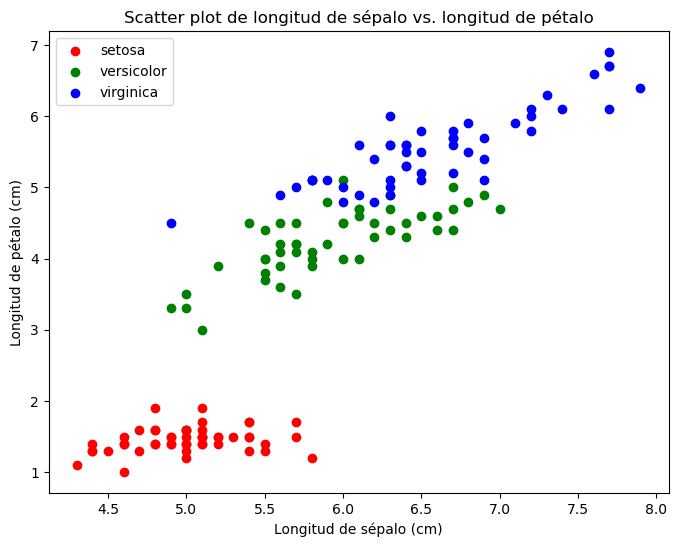

In [2]:

import matplotlib.pyplot as plt

# Definimos los nombres de las clases y los colores para cada una.
class_names = iris.target_names
colors = ['red', 'green', 'blue']

# Creamos un gráfico de dispersión para longitud de sépalo vs longitud de pétalo.
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(class_names):
    plt.scatter(X[y == i, 0], X[y == i, 2], label=class_name, color=colors[i])

plt.xlabel('Longitud de sépalo (cm)')
plt.ylabel('Longitud de pétalo (cm)')
plt.title('Scatter plot de longitud de sépalo vs. longitud de pétalo')
plt.legend()
plt.show()

### 1.2 Desarrollo 

* Ya podemos empezar con el desarrollo del modelo. Primero, tendremos que disponer los datos de forma manejable:

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Dividimos los datos en conjuntos de entrenamiento y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Escalamos los datos, haciendo que su media sea 0 y su desviación estandar 1. 
#Ténica de regularización ya vista para mejorar el rendimiento de los modelos.

print(f"Datos pre-escalado\n: {X_train[0:2]}")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"\n\nDatos post-escalado\n: {X_train[0:2]}")

Datos pre-escalado
: [[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]]


Datos post-escalado
: [[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]]


* Pasemos ahora a las etiquetas. Si hacemos print de cualquiera de ellas, observamos que estas tienen un valor entero que va del 0 al 2. Cada una de las 3 clases está representada por estos números.

In [4]:
print(f"Valores etiquetas conjunto entrenamiento: {y_train[0:9]}")
print(f"Valores etiquetas conjunto test: {y_test[0:9]}")

Valores etiquetas conjunto entrenamiento: [0 0 1 0 0 2 1 0 0]
Valores etiquetas conjunto test: [1 0 2 1 1 0 1 2 1]


* Aunque sklearn permite este tipo de entradas, suele ser una buena práctica hacer _One Hot Encoding_, ya que de esta manera nos aseguramos que cualquier modelo sea capaz de trabajar con ellas.

In [5]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder


print(f"Etiquetas originales entrenamiento:\n {y_train[0:5]}\n")
print(f"Etiquetas originales test:\n {y_test[0:5]}")

encoder = OneHotEncoder()

# Aplicamos one-hot encoding a las etiquetas de entrenamiento
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

# Aplicamos one-hot encoding a las etiquetas de prueba
y_test_encoded = encoder.transform(y_test.reshape(-1, 1)).toarray()

# Mostrar los resultados
print(f"\n\nEtiquetas one-hot entrenamiento:\n {y_train_encoded[0:5]}")
print(f"\n\nEtiquetas one-hot entrenamiento:\n {y_test_encoded[0:5]}")

Etiquetas originales entrenamiento:
 [0 0 1 0 0]

Etiquetas originales test:
 [1 0 2 1 1]


Etiquetas one-hot entrenamiento:
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


Etiquetas one-hot entrenamiento:
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


* Ya tenemos todos los datos en la forma que necesitamos. Ahora podemos pasar al desarrollo de la red neuronal en sí:

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Creamos un clasificador MLP (Multi-Layer Perceptron). Dentro del mismo, es posible modificar una gran 
#cantidad de características (hiperparámetros) para así ajustar la red a nuestras necesidades. 
#Algunas de las más importantes son:

clf = MLPClassifier(
    hidden_layer_sizes=(50,25),     # Número de neuronas por cada capa oculta.
    max_iter=100,                   # Número de iteraciones.
    alpha=0.0001,                   # Regularización L2.
    learning_rate_init=0.001,       # Tasa de aprendizaje.
    early_stopping=True,            # Detener el entrenamiento en caso de no poder mejorar más.
    validation_fraction=0.2,        # Porcentaje de los datos que se emplean en validación.
    n_iter_no_change=10,            # Detener si no hay mejora en 10 iteraciones.
    random_state=42                 # Estado aleatorio desde el que se empieza.
)

#Notar que en scikit-learn, la aplicación del conjunto de validación es tan simple como
#fijar un valor para la variable "validation_fraction" y activar "early_stopping"


# Entrenamos el modelo usando las características y las etiquetas.
clf.fit(X_train, y_train_encoded)

# Hacemos que el modelo intente predecir los datos de prueba.
y_pred = clf.predict(X_test)

# Comprobamos, partiendo de las anteriores predicciones, la precisión obtenida.
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')


Precisión del modelo: 83.33%


* La precisión es siempre un valor clave en cualquier problema de clasificación. Sin embargo, por sí sola no nos dice mucho. Si queremos obtener más información respecto al rendimiento del modelo respecto a cada clase, debemos de hacer uso de gráficas.
  
* [Seaborn](https://seaborn.pydata.org/) es una librería especializada en la visualización de datos estadísticos. Con ella, es posible crear diferentes gráficas que aporten una mayor claridad. Por ejemplo, podemos generar una matriz de confusión, combinada con un estilo de mapa de calor, para apreciar como de bien/mal se clasificó cada clase.

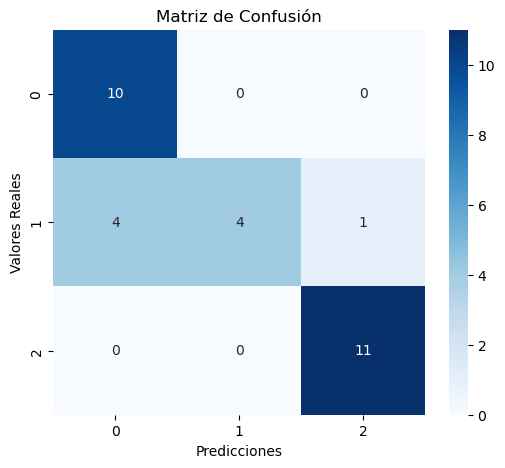

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Conversión requerida para la matriz de confusión de seaborn.
y_test_conf_matrix = np.argmax(y_test_encoded, axis=1)
y_pred_conf_matrix = np.argmax(y_pred, axis=1)          


# Generar la matriz de confusión.
cm = confusion_matrix(y_test_conf_matrix, y_pred_conf_matrix)


# Para visualizar la matriz de confusión como un mapa de calor:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test_conf_matrix), 
            yticklabels=np.unique(y_test_conf_matrix))
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()


* Se ve que existe un problema entre la clase 0 y 1. En caso de querer mejorarlo, deberíamos intentar de ajustar mejor la separación de dichas clases.
  
* También es posible obtener la evolución de la función de pérdida para ver como el modelo mejora conforme se ejecutan iteraciones. Para el sistema desarrollado, se obtiene lo siguiente:

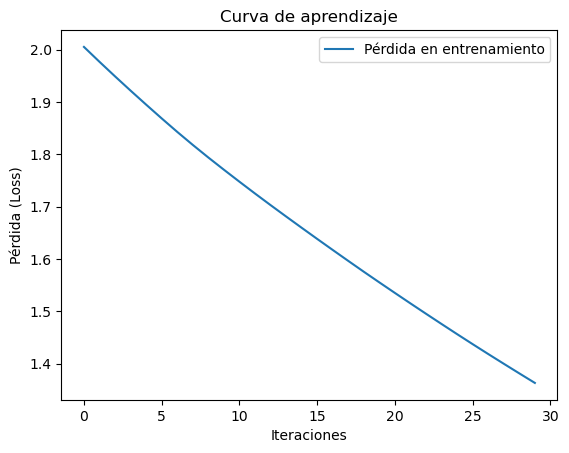

In [8]:

train_loss = clf.loss_curve_

plt.plot(train_loss, label="Pérdida en entrenamiento")
plt.title('Curva de aprendizaje')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.show()

## 2. Vuestro turno

* Para el desarrollo de la práctica, emplearemos el dataset 
<a href=https://www.kaggle.com/datasets/yasserh/wine-quality-dataset> Wine </a>, formado por un conjunto de 178 instancias de muestras de vino.

* Tendréis que completar las siguientes tareas:

1. Desarrollad un modelo de red neuronal que permita realizar una clasificación lo más precisa posible del dataset dado. Seguid los pasos mostrados para el ejemplo resuelto de IRIS, tratando de obtener una precisión final lo más alta posible. Basaos en la metodología de selección de hiperparámetros _Grid Search_ para que la optimización sea lo más ordenada posible. Obtened una representación gráfica sobre la clasificación de las instancias.

2. Razonad sobre las siguientes cuestiones:


   - En base a la representación obtenida en la primera tarea, ¿existe alguna clase especialmente problemática? En caso afirmativo, ¿cuál podría ser la razón?
   - El preprocesado, así como los métodos de regularización empleados en la sección 1 de la práctica, fueron bastante simples. ¿Podría el modelo beneficiarse de la utilización de otras técnicas pre-entrenamiento? De ser así, intenta aplicar alguna y reentrena la red para ver si los resultados mejoran.
    - Durante la primera sección no se dedicó un apartado a comprobar si podría existir riesgo de _overfitting_. Basándonos en el modelo implementado y las gráficas obtenidas, ¿podría ser esto posible para el modelo de la sección 1? ¿Y para el modelo recién desarrollado de la sección 2?




__NOTA__: Muchos de los parámetros o decisiones previas al entrenamiento del modelo de la sección 1 no han sido optimizados/pulidos a fin de no poneros las cosas demasiado fáciles. No os dediquéis únicamente a copiar los pasos.



In [9]:
from sklearn.datasets import load_wine

# Cargamos el dataset.
data = load_wine()


# Accedemos a los datos.
X = data.data   
y = data.target

print(f"Número de instancias y características {X.shape}, total de clases: {len(set(y))}")



Número de instancias y características (178, 13), total de clases: 3
